In [1]:
!python --version

Python 3.8.8


# LGMVIP-DataScience

# Task 4

# Author : Anupam Tudu

# Develop A Neural Network That Can Read Handwriting

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading the MNIST dataset

In [3]:
data = tf.keras.datasets.mnist

## Splitting into train and test images and their labels

In [4]:
(train_img, train_lbl), (test_img, test_lbl) = data.load_data()

In [5]:
train_img.shape, train_lbl.shape

((60000, 28, 28), (60000,))

In [6]:
test_img.shape, test_lbl.shape

((10000, 28, 28), (10000,))

## Data Visualization

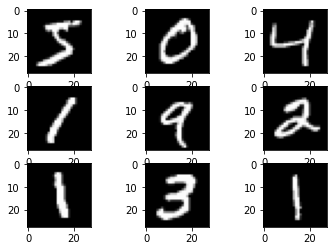

In [7]:
for i in range(9):
    plt.subplot(331+i)
    plt.imshow(train_img[i], cmap='gray')
plt.show()

## Normalizing of Data

In [8]:
train_img = train_img/255
test_img = test_img/255

## Building the NN

In [9]:
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
nn.add(tf.keras.layers.Dense(128, activation='relu'))
nn.add(tf.keras.layers.Dense(128, activation='relu'))
nn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
# Compilation of the Model
nn.compile(optimizer=tf.keras.optimizers.Adam(),
           loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Fitting the train data into the neural network
nn.fit(train_img, train_lbl, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2283 - accuracy: 0.9321
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0973 - accuracy: 0.9698
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0670 - accuracy: 0.9788
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0496 - accuracy: 0.9848
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0420 - accuracy: 0.9865
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0328 - accuracy: 0.9891
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0298 - accuracy: 0.9900
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0224 - accuracy: 0.9926
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0220 - accuracy: 0.9927
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

## Evaluation with the Test Data

In [12]:
loss, acc = nn.evaluate(test_img, test_lbl)

313/313 [==============================] - 1s 2ms/step - loss: 0.1195 - accuracy: 0.9796


In [13]:
print("Accuracy of the Model:", int(acc*100), "%")

Accuracy of the Model: 97 %


This number is: 7


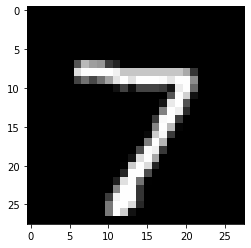

This number is: 2


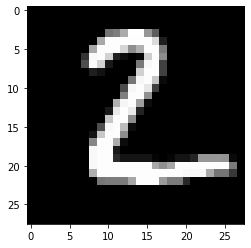

This number is: 1


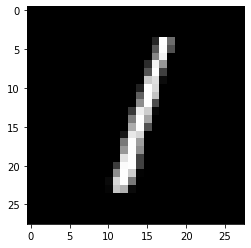

This number is: 0


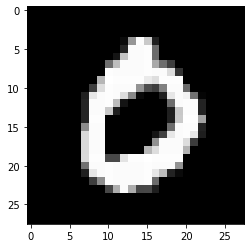

This number is: 4


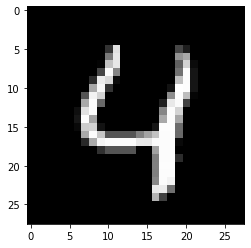

In [14]:
for i in range(0, 5):
    plt.imshow(test_img[i])
    prediction = nn.predict(test_img)
    print("This number is:",np.argmax(prediction[i]))
    plt.imshow(test_img[i], cmap='gray')
    plt.show()

As we can see the model is working well, being able to predict the correct number classes from the handwritten images of the digits quite well with an accuracy of 97%.

# The End